In [1]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from datetime import datetime 
from sympy import *
from matplotlib.dates import DateFormatter
from sklearn.datasets import fetch_mldata
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from collections import Counter

In [2]:
# data visualization
data = pd.read_csv("temp_datalab_records_linkedin_company.csv", low_memory = False)
data = data[['company_name',"followers_count","employees_on_platform",'industry',"date_updated","date_added"]]
data = data.dropna(axis = 0)
data.describe()
print('Data dimension:',data.shape)
print('Number if industries:',len(np.unique(data.industry.astype(str))))
print('Industies:',np.unique(data.industry.astype(str)))

Data dimension: (2389931, 6)
Number if industries: 140
Industies: ['Accounting' 'Airlines/Aviation' 'Apparel & Fashion'
 'Apparel &amp; Fashion' 'Automotive' 'Aviation & Aerospace'
 'Aviation &amp; Aerospace' 'Banking' 'Biotechnology' 'Broadcast Media'
 'Building Materials' 'Business Supplies and Equipment' 'Capital Markets'
 'Chemicals' 'Civil Engineering' 'Commercial Real Estate'
 'Computer & Network Security' 'Computer &amp; Network Security'
 'Computer Games' 'Computer Hardware' 'Computer Networking'
 'Computer Software' 'Construction' 'Consumer Electronics'
 'Consumer Goods' 'Consumer Services' 'Cosmetics' 'Dairy'
 'Defense & Space' 'Defense &amp; Space' 'Design' 'E-Learning'
 'Education Management' 'Electrical/Electronic Manufacturing'
 'Entertainment' 'Environmental Services' 'Events Services'
 'Executive Office' 'Facilities Services' 'Farming' 'Financial Services'
 'Fine Art' 'Food & Beverages' 'Food &amp; Beverages' 'Food Production'
 'Furniture' 'Gambling & Casinos' 'Gambling

In [3]:
# feature extraction industrial yearly increasing rate:

shrinked_updated_date=[]
for dataset in data.date_updated:
    dataset=dataset[0:4]
    shrinked_updated_date.append(dataset)
data['shrinked_updated_date']=shrinked_updated_date
#print(data)

count=0
my_dict5={}
my_dict6={}
my_dict7={}

cleanedList = [x for x in data.industry.unique() if x == x]
print(len(cleanedList))

for industry in cleanedList:
    print(industry)
    count = count+1
    print(count)

    temp1 = data[data.industry == industry]
    #print(temp1['industry'].get(temp1['industry'].keys()[0]))
    #industry_name = temp1['industry'].get(temp1['industry'].keys()[0])
    industry_name = industry

    
    comp_dates=[]
    for date in temp1['date_updated']:
        date = date[0:4]
        comp_dates.append(date)

    #print(np.unique(np.array(comp_dates)))
    #print(comp_dates.shape)
    
    followerC=[]
    employeeC=[]
    shrink_dates=[]

    for date in np.unique(np.array(comp_dates)):
        #print(date)
        #print(temp1.date_updated)
        shrink_dates.append(date)
        
        temp2=temp1[temp1.shrinked_updated_date == date]
        followerC.append(str(int(np.mean(temp2['followers_count']))))
        employeeC.append(str(int(np.mean(temp2['employees_on_platform']))))

    followerC_rate=np.zeros(len(followerC))
    employeeC_rate=np.zeros(len(employeeC))
    follower_feature=np.zeros(len(followerC)-1)
    employee_feature=np.zeros(len(employeeC)-1)
    
    for i in range(len(followerC)-1):
        follower_feature[i]=np.divide(np.subtract(int(followerC[i+1]),int(followerC[i])),int(followerC[i]))
        employee_feature[i]=np.divide(np.subtract(int(employeeC[i+1]),int(employeeC[i])),int(employeeC[i]))
    
    my_dict5[industry]=follower_feature
    my_dict6[industry]=employee_feature
    my_dict7[industry]=shrink_dates
        

140
Investment Banking
1
Aviation & Aerospace
2
Pharmaceuticals
3
Retail
4
Hospital & Health Care
5
Banking
6
Information Technology and Services
7
Computer Networking
8
Electrical/Electronic Manufacturing
9
Internet
10
Tobacco
11
Semiconductors
12
Oil & Energy
13
Automotive
14
Entertainment
15
Consumer Goods
16
Mining & Metals
17
Restaurants
18
Chemicals
19
Consumer Electronics
20
Financial Services
21
Mechanical or Industrial Engineering
22
Real Estate
23
Utilities
24
Biotechnology
25
Food & Beverages
26
Telecommunications
27
Research
28
Wine and Spirits
29
Media Production
30
Wireless
31
Computer Software
32
Transportation/Trucking/Railroad
33
Computer Games
34
Health, Wellness and Fitness
35
Defense & Space
36
Insurance
37
Sporting Goods
38
Medical Devices
39
Machinery
40
Airlines/Aviation
41
Leisure, Travel & Tourism
42
Food Production
43
Hospitality
44
Human Resources
45
Environmental Services
46
Dairy
47
Apparel & Fashion
48
Package/Freight Delivery
49
Construction
50
Investment

/Users/rongrongliu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in true_divide
/Users/rongrongliu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in true_divide


Medical Practice
135
Law Practice
136
Nonprofit Organization Management
137
Graphic Design
138
Photography
139
Market Research
140


In [4]:
# data test
print(my_dict5['Investment Banking'])
print(my_dict6['Investment Banking'])
print(my_dict7['Investment Banking'])

[ 0.03226053 -0.74342024  0.06980906]
[-0.02558284 -0.69709146  0.0247965 ]
['2015', '2016', '2017', '2018']


In [5]:
# fill in empty features
full_dates=my_dict7['Investment Banking']
full_dates=full_dates[1:]
print((full_dates))
full_dict5={}
full_dict6={}
full_dict7={}

for key in my_dict7.keys():
    temp7=my_dict7.get(key)
    #print(len(temp3))
    if len(temp7)>1:
        temp7=temp7[1:]
    else: continue
        
    temp6=my_dict6.get(key)
    temp5=my_dict5.get(key)
    #temp4=my_dict4.get(key)
   # print((temp4))
    
    T6=np.zeros(len(full_dates))
    T5=np.zeros(len(full_dates))
    #T4=[]#np.zeros(len(full_dates))
    #print(len(T1))
    
    #print(range(len(full_dates)-1))
    #print(temp3)

    for i in range(len(full_dates)):
        #print(i)
        if full_dates[i] in temp7:
            Ind=temp7.index(full_dates[i])
            #print(Ind)
            T6[i]=temp6[Ind]
            T5[i]=temp5[Ind]
            #print(temp4[Ind])
            #T4.append(temp4[Ind])
            
    full_dict5[key]=T5
    full_dict6[key]=T6
    #full_dict3[key]=T4
    
#print(len(full_dict1))
#print(full_dict1['Alcon'])
#print(list(full_dict1.values()))
#print((full_dict1.values()))
Y=np.concatenate((np.array(list(full_dict5.values())),np.array(list(full_dict6.values()))),axis=1)
Y1=np.array(list(full_dict5.values()))
Y2=np.array(list(full_dict6.values()))
print(Y.shape)
print(Y1.shape)
print(Y2.shape)

['2016', '2017', '2018']
(137, 6)
(137, 3)
(137, 3)


(137, 6)
['2016', '2017', '2018']
[-0.0418641  -0.03334364  0.18676346]


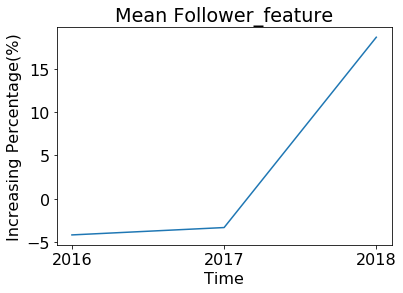

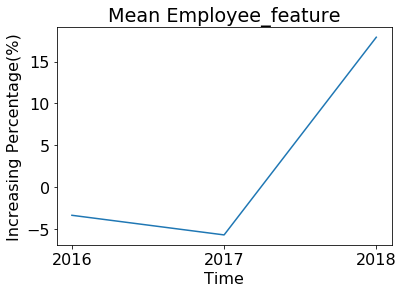

In [7]:
# data test
full_dates=my_dict7['Investment Banking']
Y=np.nan_to_num(Y)
print((Y.shape))
print(full_dates[1:])
print((np.mean(Y[:,0:3],axis=0)))
#plt.xticks(np.arange(len(full_dates), step=3),rotation='vertical')
plt.plot(full_dates[1:],np.multiply(np.mean(Y[:,0:3],axis=0),100))
plt.rcParams.update({'font.size': 16})
plt.xlabel('Time')
plt.title('Mean Follower_feature')
plt.ylabel('Increasing Percentage(%)')
plt.show()
#plt.xticks(np.arange(len(full_dates), step=3),rotation='vertical')
plt.plot(full_dates[1:],np.multiply(np.mean(Y[:,3:],axis=0),100))
plt.rcParams.update({'font.size': 16})
plt.xlabel('Time')
plt.title('Mean Employee_feature')
plt.ylabel('Increasing Percentage(%)')
plt.show()

In [9]:
# clustering companies according to industrial yearly increasing rates of followers:
Y=np.nan_to_num(Y)
Y1=np.nan_to_num(Y1)
Y2=np.nan_to_num(Y2)
kmeans = KMeans(n_clusters=7,random_state=0)
kmeans.fit(Y)
y_kmeans = kmeans.predict(Y)
print(y_kmeans)
print(full_dates)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 2 0 0 0 4 2 0 0 0
 0 0 0 0 2 4 4 0 0 2 0 4 0 3 0 0 0 2 0 0 0 4 0 0 2 0 0 0 0 2 2 4 4 4 2 2 0
 4 4 2 2 0 0 0 0 0 2 0 2 2 0 0 0 0 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2
 0 2 2 6 2 1 2 2 2 2 2 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
['2015', '2016', '2017', '2018']


137
(66, 6)
['Accounting' 'Airlines/Aviation' 'Apparel & Fashion' 'Automotive'
 'Aviation & Aerospace' 'Banking' 'Biotechnology' 'Broadcast Media'
 'Business Supplies and Equipment' 'Chemicals' 'Civil Engineering'
 'Commercial Real Estate' 'Computer Hardware' 'Computer Networking'
 'Computer Software' 'Construction' 'Consumer Electronics'
 'Consumer Goods' 'Cosmetics' 'Defense & Space' 'Education Management'
 'Electrical/Electronic Manufacturing' 'Entertainment'
 'Environmental Services' 'Facilities Services' 'Financial Services'
 'Food & Beverages' 'Glass, Ceramics & Concrete'
 'Health, Wellness and Fitness' 'Hospital & Health Care' 'Human Resources'
 'Individual & Family Services' 'Industrial Automation'
 'Information Services' 'Information Technology and Services' 'Insurance'
 'Internet' 'Investment Banking' 'Luxury Goods & Jewelry' 'Machinery'
 'Management Consulting' 'Marketing and Advertising'
 'Mechanical or Industrial Engineering' 'Media Production'
 'Medical Devices' 'Mining &

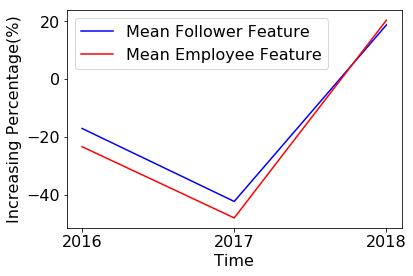

(1, 6)
['Gambling &amp; Casinos']


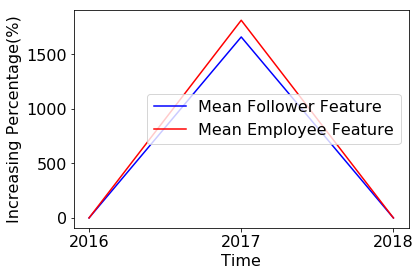

(57, 6)
['Apparel &amp; Fashion' 'Aviation &amp; Aerospace' 'Capital Markets'
 'Computer & Network Security' 'Computer &amp; Network Security'
 'Computer Games' 'Dairy' 'Defense &amp; Space' 'Design' 'E-Learning'
 'Events Services' 'Executive Office' 'Fine Art' 'Food &amp; Beverages'
 'Furniture' 'Gambling & Casinos' 'Government Administration'
 'Graphic Design' 'Higher Education' 'Hospital &amp; Health Care'
 'International Trade and Development' 'Law Enforcement' 'Law Practice'
 'Legal Services' 'Leisure, Travel & Tourism'
 'Leisure, Travel &amp; Tourism' 'Logistics and Supply Chain'
 'Luxury Goods &amp; Jewelry' 'Maritime' 'Medical Practice' 'Military'
 'Mining &amp; Metals' 'Music' 'Nonprofit Organization Management'
 'Oil &amp; Energy' 'Outsourcing/Offshoring' 'Photography' 'Printing'
 'Professional Training & Coaching' 'Professional Training &amp; Coaching'
 'Program Development' 'Public Relations and Communications'
 'Public Safety' 'Railroad Manufacture' 'Ranching' 'Real Estate

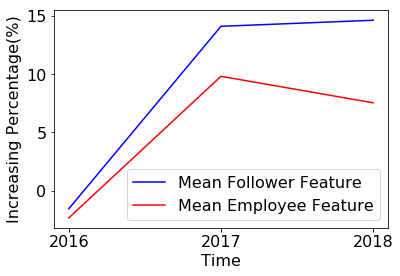

(1, 6)
['Investment Management']


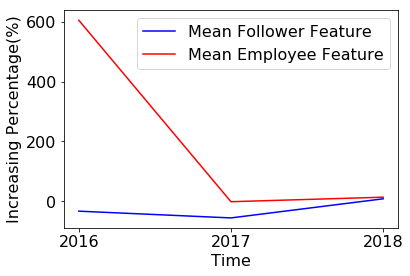

(10, 6)
['Building Materials' 'Consumer Services' 'Food Production' 'Hospitality'
 'Online Media' 'Package/Freight Delivery' 'Paper & Forest Products'
 'Renewables & Environment' 'Security and Investigations'
 'Transportation/Trucking/Railroad']


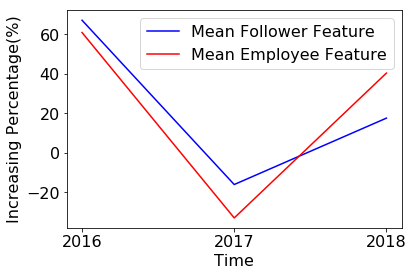

(1, 6)
['Motion Pictures and Film']


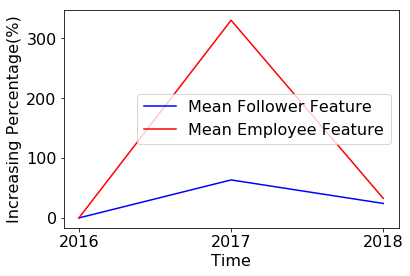

(1, 6)
['Farming']


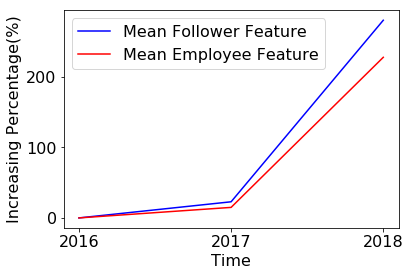

In [13]:
print(len(full_dict5.keys()))
Ukeys=np.array(full_dict5.keys())
#print((np.array(y_kmeans)))
y_kmeans=np.array(y_kmeans)
for vae in np.unique(y_kmeans):
    temp1=Y[y_kmeans==vae]
    print(temp1.shape)
    Ind = np.where(y_kmeans == vae)
    #print((Ind[0]))
    keyshere=[]
    for i in range(len(Ind[0])):
        tmp=list(Ukeys.tolist())[Ind[0][i]]
        keyshere.append(tmp)
    keysH=np.unique(keyshere)
    print(keysH)
    #counts=Counter(keyshere)
    #print(counts)
    tmp2=[]
    cnt=0
    for key in keysH:
        cnt=cnt+1
        tmp0=(data[data.industry==key])
        #print(tmp0['industry'])
        tmp1 =(tmp0.company_name.values)
        #if cnt%10 == 0:
        #    print(cnt)
        tmp2.append(tmp1)
    #print(counts)
    
    plt.plot(full_dates[1:],np.multiply(np.mean(temp1[:,0:3],axis=0),100),'b',label='Mean Follower Feature')
    #plt.plot(np.multiply(np.mean(temp1[:,0:],axis=0),100))
    #plt.axis([0.0,2.0,-200,200])
   # plt.show()
    plt.plot(full_dates[1:],np.multiply(np.mean(temp1[:,3:],axis=0),100),'r',label='Mean Employee Feature')
    plt.rcParams.update({'font.size': 16})
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Increasing Percentage(%)')
    #plt.axis([0.0,2.0,-100,600])
    plt.show()
   # print(temp1.shape)


In [48]:
# clustering companies according to industrial yearly increasing rates of followers:
Y=np.nan_to_num(Y)
Y1=np.nan_to_num(Y1)
Y2=np.nan_to_num(Y2)
kmeans = KMeans(n_clusters=4,random_state=0)
kmeans.fit(Y2)
y_kmeans = kmeans.predict(Y2)
print(y_kmeans)
print(full_dates)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 3 0 0 0 0 0 0 0 0
 0 0 0 0 0 3 0 0 0 3 0 0 0 2 0 0 0 3 0 0 0 0 0 0 3 0 0 0 0 3 3 3 0 3 0 0 0
 0 2 3 3 0 0 0 0 0 3 0 3 3 0 0 0 0 3 0 3 0 3 3 0 0 3 3 3 3 3 3 3 3 3 3 3 3
 0 3 3 0 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
['2015', '2016', '2017', '2018']


137
['Accounting' 'Airlines/Aviation' 'Apparel & Fashion' 'Automotive'
 'Aviation & Aerospace' 'Banking' 'Biotechnology' 'Broadcast Media'
 'Business Supplies and Equipment' 'Chemicals' 'Civil Engineering'
 'Commercial Real Estate' 'Computer Games' 'Computer Hardware'
 'Computer Networking' 'Computer Software' 'Construction'
 'Consumer Electronics' 'Consumer Goods' 'Consumer Services' 'Cosmetics'
 'Defense & Space' 'Design' 'Education Management'
 'Electrical/Electronic Manufacturing' 'Entertainment'
 'Environmental Services' 'Facilities Services' 'Farming'
 'Financial Services' 'Food & Beverages' 'Gambling & Casinos'
 'Glass, Ceramics & Concrete' 'Health, Wellness and Fitness'
 'Hospital & Health Care' 'Hospitality' 'Human Resources'
 'Individual & Family Services' 'Industrial Automation'
 'Information Services' 'Information Technology and Services' 'Insurance'
 'Internet' 'Investment Banking' 'Leisure, Travel & Tourism'
 'Luxury Goods & Jewelry' 'Machinery' 'Management Consulting'
 '

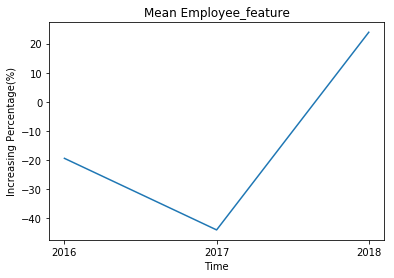

['Gambling &amp; Casinos']


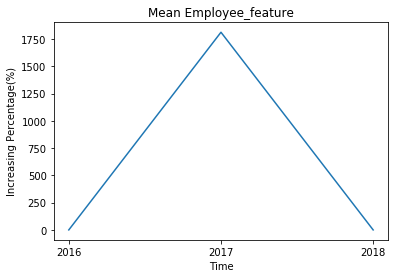

['Investment Management' 'Renewables & Environment']


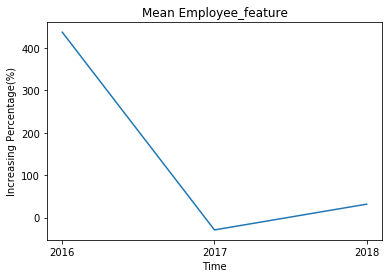

['Apparel &amp; Fashion' 'Aviation &amp; Aerospace' 'Building Materials'
 'Capital Markets' 'Computer & Network Security'
 'Computer &amp; Network Security' 'Dairy' 'Defense &amp; Space'
 'E-Learning' 'Events Services' 'Executive Office' 'Fine Art'
 'Food &amp; Beverages' 'Food Production' 'Furniture'
 'Government Administration' 'Graphic Design' 'Higher Education'
 'Hospital &amp; Health Care' 'International Trade and Development'
 'Law Enforcement' 'Law Practice' 'Legal Services'
 'Leisure, Travel &amp; Tourism' 'Logistics and Supply Chain'
 'Luxury Goods &amp; Jewelry' 'Maritime' 'Medical Practice' 'Military'
 'Mining &amp; Metals' 'Motion Pictures and Film' 'Music'
 'Nonprofit Organization Management' 'Oil &amp; Energy' 'Photography'
 'Professional Training & Coaching' 'Professional Training &amp; Coaching'
 'Program Development' 'Public Relations and Communications'
 'Public Safety' 'Railroad Manufacture' 'Ranching' 'Real Estate'
 'Recreational Facilities and Services' 'Renewables

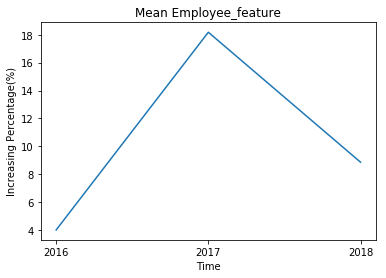

In [49]:
print(len(full_dict5.keys()))
Ukeys=np.array(full_dict5.keys())
#print((np.array(y_kmeans)))
y_kmeans=np.array(y_kmeans)
for vae in np.unique(y_kmeans):
    temp1=Y[y_kmeans==vae]
    Ind = np.where(y_kmeans == vae)
    #print((Ind[0]))
    keyshere=[]
    for i in range(len(Ind[0])):
        tmp=list(Ukeys.tolist())[Ind[0][i]]
        keyshere.append(tmp)
    keysH=np.unique(keyshere)
    print(keysH)
    tmp2=[]
    cnt=0
    for key in keysH:
        cnt=cnt+1
        tmp0=(data[data.industry==key])
        #print(tmp0['industry'])
        tmp1 =(tmp0.company_name.values)
        #if cnt%10 == 0:
        #    print(cnt)
        tmp2.append(tmp1)
    #print(counts)
    
    plt.plot(full_dates[1:],np.multiply(np.mean(temp1[:,3:],axis=0),100))
    plt.xlabel('Time')
    plt.title('Mean Employee_feature')
    plt.ylabel('Increasing Percentage(%)')
    #plt.axis([0.0,2.0,-200,200])
    plt.show()
   # print(temp1.shape)